In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits_df = pd.DataFrame(digits.data, digits.target)
digits_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
digits_df['target'] = digits.target
digits_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [6]:
from sklearn.svm import SVC #CONTINUE FROM HERE
from sklearn.model_selection import train_test_split

In [7]:
X = digits_df.drop(columns='target')
y = digits_df. target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
results = model.predict(X_test)
results.flatten()

final_df = pd.DataFrame(results.flatten(), y_test)
final_df

,0
target,
5,5
0,0
0,0
2,2
6,6
...,...
9,9
4,4
5,5


# Random Forest Classification

In [10]:
car_df = pd.read_csv('data/car_evaluation.csv')
car_df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [11]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


car_df.columns = col_names
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = car_df.drop(columns=['class'])
y = car_df['class']

In [14]:
len(X)

1727

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=42)


In [16]:
len(X_test)

415

In [20]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [22]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_test

,buying,maint,doors,persons,lug_boot,safety
599,3,3,3,2,2,2
932,4,1,3,1,2,2
628,3,3,1,2,2,1
1497,1,3,1,1,3,3
1262,4,2,3,3,3,2
...,...,...,...,...,...,...
1140,4,4,3,2,2,3
218,2,4,4,2,3,2
631,3,3,1,1,1,1
286,2,4,3,1,2,1


In [37]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
model.score(X_test, y_test)

0.8939759036144578

# Feature engineering

In [39]:
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.247800
persons     0.238222
buying      0.173452
maint       0.160385
lug_boot    0.093108
doors       0.087034
dtype: float64

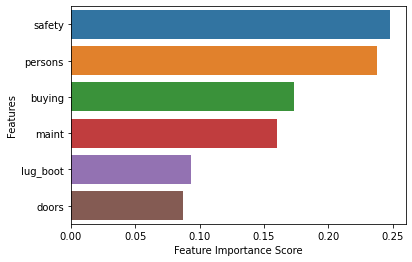

In [41]:
sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')
plt.show()

In [42]:
import joblib

In [43]:
joblib.dump(model, 'CarEvaluationmodel.pkl')

['CarEvaluationmodel.pkl']

In [44]:
model1 = joblib.load('CarEvaluationmodel.pkl')

In [51]:
y_pred = model1.predict(X_test)
predicted_vs_real = pd.DataFrame({'y_predcited':y_pred.flatten(), 'y_test':y_test})
predicted_vs_real.head()

,y_predcited,y_test
599,unacc,unacc
932,unacc,unacc
628,unacc,unacc
1497,acc,acc
1262,unacc,unacc
